In [ ]:
import os
import numpy as np
import pandas as pd


In [ ]:
import os

# Function to rename files from .jpg to .jpeg in a directory
def rename_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            # Rename file by replacing .jpg with .jpeg
            new_filename = filename.replace('.jpg', '.jpeg')
            os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
            print(f'Renamed: {filename} -> {new_filename}')

# Example usage
directory_to_rename = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\Features'
rename_files(directory_to_rename)


In [ ]:
import os
import glob
import cv2
import numpy as np

# Define dataset paths
dataset_dir = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm'
real_dir = os.path.join(dataset_dir, 'real', 'REAL_SVM')
fake_dir = os.path.join(dataset_dir, 'fake', 'FAKE_SVM')

# Define the function to load images from a folder with debug prints
def load_images_from_folder(folder):
    images = []
    print(f"Loading images from: {folder}")  # Debug print
    for filename in glob.glob(os.path.join(folder, '*.jpeg')):
        print(f"Found file: {filename}")  # Debug print
        img = cv2.imread(filename)
        if img is not None:
            images.append(img)
        else:
            print(f"Failed to load image: {filename}")  # Debug print
    return images

In [ ]:
real_folder = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM'
real_images = load_images_from_folder(real_folder)
print(f'Loaded {len(real_images)} real images from {real_folder}')

# Load fake images from the specified directory
fake_folder = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\FAKE_SVM'
fake_images = load_images_from_folder(fake_folder)
print(f'Loaded {len(fake_images)} fake images from {fake_folder}')


# Load fake images from the specified directory
feature_folder = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\Features'
feature_images = load_images_from_folder(feature_folder)
print(f'Loaded {len(feature_images)} feature images from {feature_folder}')

Loading images from: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1032.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_110.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1224.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1257.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1269.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1436.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SVM\aug_0_1637.jpeg
Found file: C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_svm\REAL_SV

In [ ]:
import pandas as pd
import cv2
import numpy as np

# Load CSV file containing image paths and labels
csv_file_path = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\final_label.csv'
data = pd.read_csv(csv_file_path)

# Extract image paths and labels from the DataFrame
image_paths = data['image_path'].values
labels = data['label'].values

# Specify the directory path where images are located
image_dir = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_SVM'

# Function to load images from paths
def load_images_from_paths(image_paths):
    images = []
    for path in image_paths:
        try:
            # Construct full image path
            full_image_path = os.path.join(image_dir, path)
            img = cv2.imread(full_image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Failed to load image: {full_image_path}")  # Debug print for failed loads
        except Exception as e:
            print(f"Error loading image {full_image_path}: {str(e)}")
    return images

# Load images from paths
images = load_images_from_paths(image_paths)
print(f'Loaded {len(images)} images from {csv_file_path}')

# Optionally, resize and normalize the images if needed
def preprocess_images(images, image_size=(300, 300)):
    processed_images = []
    for img in images:
        try:
            # Resize image to desired size
            img_resized = cv2.resize(img, image_size)
            # Normalize image
            img_normalized = img_resized.astype(np.float32) / 255.0
            processed_images.append(img_normalized)
        except Exception as e:
            print(f"Error preprocessing image: {str(e)}")
    return np.array(processed_images)

# Preprocess images
images_processed = preprocess_images(images)

# Check shapes (should match number of images and labels)
print(f"Loaded images shape: {images_processed.shape}")
print(f"Loaded labels shape: {labels.shape}")


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Path to your labels.csv file
labels_file = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\final_label.csv'

# Define dataset paths
dataset_dir = r'C:\Users\srish\OneDrive\Desktop\Project final\Fake_currency_SVM\Currency_SVM'
real_dir = os.path.join(dataset_dir, 'REAL_SVM')
fake_dir = os.path.join(dataset_dir, 'FAKE_SVM')
features_dir = os.path.join(dataset_dir, 'Features')

# Function to load images and extract HOG features
def load_and_preprocess_data(labels_file, real_dir, fake_dir, features_dir, image_size=(224, 224)):
    # Read labels.csv to a DataFrame
    labels_df = pd.read_csv(labels_file)

    images = []
    labels = []

    # Iterate through each row in the DataFrame
    for index, row in labels_df.iterrows():
        image_path = row['image_path']
        label = row['label']

        # Construct absolute image path
        absolute_image_path = os.path.join(dataset_dir, image_path)

        # Load image based on label
        if label == 0:
            img = cv2.imread(os.path.join(real_dir, image_path))
        elif label == 1:
            img = cv2.imread(os.path.join(fake_dir, image_path))
        else:
            print(f"Unknown label: {label}")
            continue

        if img is not None:
            # Convert image to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize image to desired size (optional)
            img_resized = cv2.resize(img_gray, image_size)

            # Compute HOG features
            hog_features = hog(img_resized, pixels_per_cell=(16, 16), cells_per_block=(2, 2))

            # Append features and label
            images.append(hog_features)
            labels.append(label)
        else:
            print(f"Failed to load image: {absolute_image_path}")

    # Convert lists to numpy arrays
    X = np.array(images)
    y = np.array(labels)

    return X, y

# Step 1: Load and preprocess data
X, y = load_and_preprocess_data(labels_file, real_dir, fake_dir, features_dir)

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: SVM Model Training
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       202
           1       0.99      0.97      0.98       212

    accuracy                           0.98       414
   macro avg       0.98      0.98      0.98       414
weighted avg       0.98      0.98      0.98       414



Confusion Matrix:
[[199   3]
 [  6 206]]


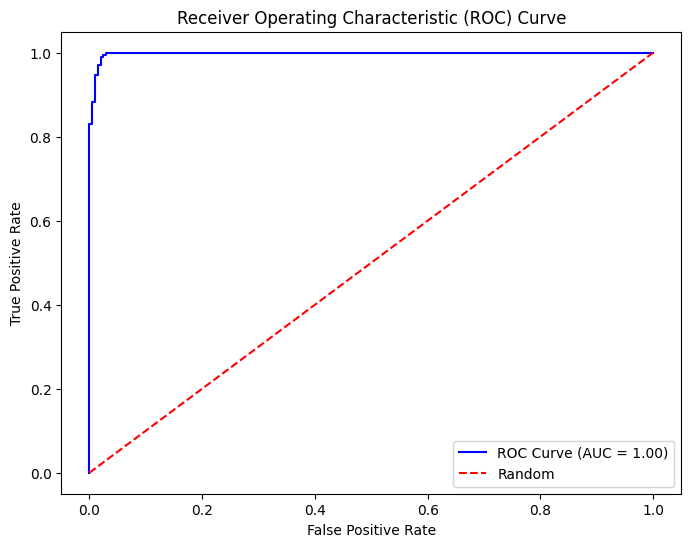

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Example: ROC Curve and AUC
y_pred_proba = svm_classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
# Import joblib directly
import joblib

# Other necessary imports
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog

# Assuming X_train, X_test, y_train, y_test are already defined

# PCA for feature selection
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Save the PCA model
joblib.dump(pca, 'pca_model.pkl')

# GridSearchCV for SVM hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best estimator
y_pred_grid = best_estimator.predict(X_test_pca)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy after grid search: {accuracy_grid}")

# Save the trained SVM model
joblib.dump(best_estimator, 'svm_model.pkl')


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator: SVC(C=10, random_state=42)
Accuracy after grid search: 0.9830917874396136


['svm_model.pkl']

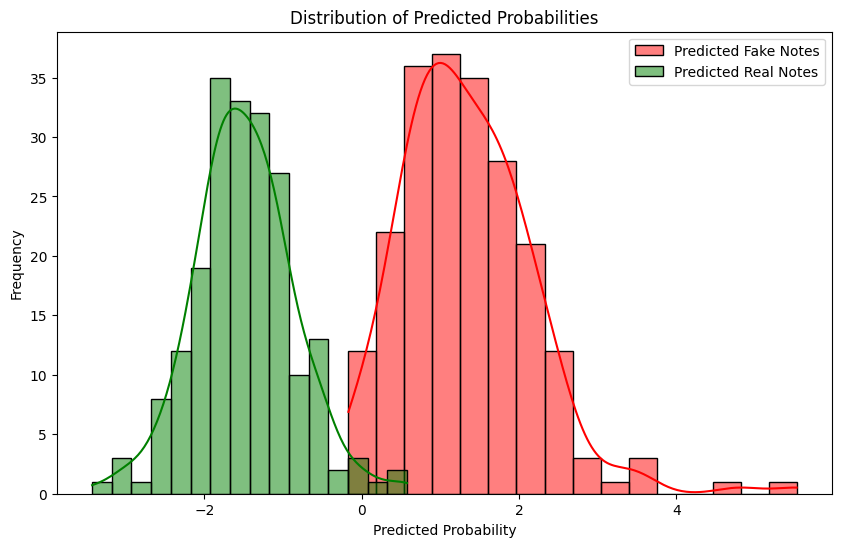

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute predicted probabilities
y_pred_proba = svm_classifier.decision_function(X_test)

# Separate predicted probabilities for each class
proba_fake = y_pred_proba[y_test == 1]
proba_real = y_pred_proba[y_test == 0]

# Plot histograms or density plots
plt.figure(figsize=(10, 6))

# Plot histogram for fake notes
sns.histplot(proba_fake, kde=True, color='red', label='Predicted Fake Notes')
# Plot histogram for real notes
sns.histplot(proba_real, kde=True, color='green', label='Predicted Real Notes')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()


In [ ]:
# Function to predict the class of an unknown image
def predict_unknown_image(image_path, pca_model, svm_model, image_size=(224, 224)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, image_size)
    hog_features = hog(img_resized, orientations=HOG_ORIENTATIONS, pixels_per_cell=HOG_PIXELS_PER_CELL,
                       cells_per_block=HOG_CELLS_PER_BLOCK, block_norm=HOG_BLOCK_NORM)
    hog_features_pca = pca_model.transform([hog_features])
    prediction = svm_model.predict(hog_features_pca)
    return prediction[0]

# Path to the unknown image
unknown_image_path = r'C:\Users\srish\OneDrive\Desktop\Project final\currency\Fake\F5 (2).JPEG'

# Load the saved PCA model and SVM classifier
pca = joblib.load('pca_model.pkl')
svm_classifier = joblib.load('svm_model.pkl')

# Predict the class of the unknown image
predicted_class = predict_unknown_image(unknown_image_path, pca, svm_classifier)

# Map the predicted class to a readable label (optional, depends on your label encoding)
label_mapping = {0: 'Real', 1: 'Fake'}
predicted_label = label_mapping[predicted_class]

print(f"The predicted class for the image is: {predicted_label}")

The predicted class for the image is: Fake
